In [16]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

divis = [0,30,35,49,62,120,125,156,181,199,212,221,232,236,264]
labels = ['SMTH','SMTM','CNG','AUD','DMN','MEM','VIS','FRNT','SAL','SUB','VTRL','DRSL','CBL','UNK']
network_dct = {'DMN': 'tab:blue', 'VIS': 'tab:orange', 'SUB': 'tab:green', 'UNK': 'tab:red', 'FRNT': 'tab:purple', 
               'DRSL': 'tab:brown', 'AUD': 'tab:pink', 'MEM': 'tab:grey', 'SMTH': 'tab:olive', 'SMTM': 'tab:cyan',
              'CNG': 'lightcoral', 'SAL': 'bisque', 'VTRL': 'lightsteelblue', 'CBL': 'orchid'}

import nilearn
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting
import matplotlib.patches as mpatches

rois = nilearn.datasets.fetch_coords_power_2011()['rois']

rois

,roi,x,y,z
0,1,-25,-98,-12
1,2,27,-97,-13
2,3,24,32,-18
3,4,-56,-45,-24
4,5,8,41,-24
...,...,...,...,...
259,260,-27,-71,37
260,261,-32,-1,54
261,262,-42,-60,-9
262,263,-17,-59,64


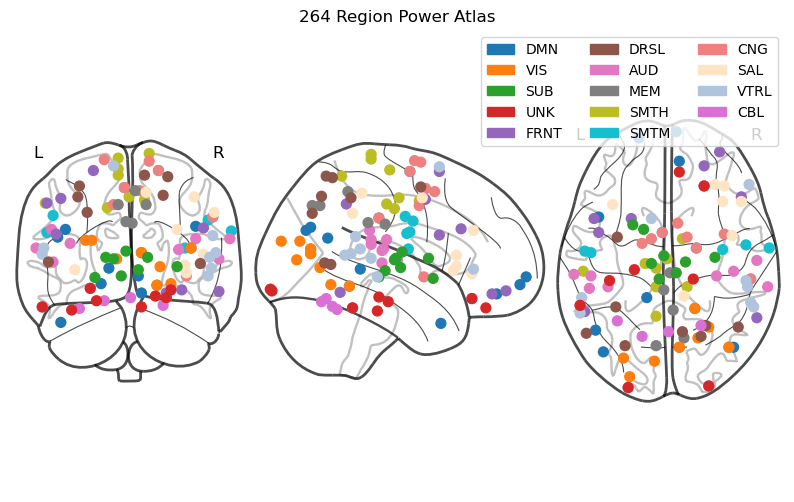

In [20]:
# Graph power ROIs
# 5 ROIs from each network in network_dct (not all networks)

rrois = np.zeros((264,3))
coords = []
colors = []

# Rearrange ROIs
for i in range(264):
    r = rois.iloc[ours2orig[i]]
    rrois[i][0] = r.x
    rrois[i][1] = r.y
    rrois[i][2] = r.z

for d,lab in zip(divis[:-1], labels):
    if lab not in network_dct:
        continue
    for i in range(8):
        coords.append(rrois[d+i])
        colors.append(network_dct[lab])

N = len(coords)
adj = np.zeros((N,N))

fig, ax = plt.subplots(1,1,figsize=(10,6))
plotting.plot_connectome(adj, coords, colors, axes=ax)
ax.set_title('264 Region Power Atlas')
handles = [mpatches.Patch(color=v, label=k) for k,v in network_dct.items()]
ax.legend(handles=handles, ncol=3)

fig.savefig('/home/anton/Documents/Yale/MedicalImageAnalysis/Figures/power.pdf')
fig.show()

In [22]:
# Get timeseries graphs

import pickle

timeseries = pickle.load(open('/home/anton/Documents/Yale/HCP/timeseries_ya.pkl', 'rb'))

print('Done')

Done


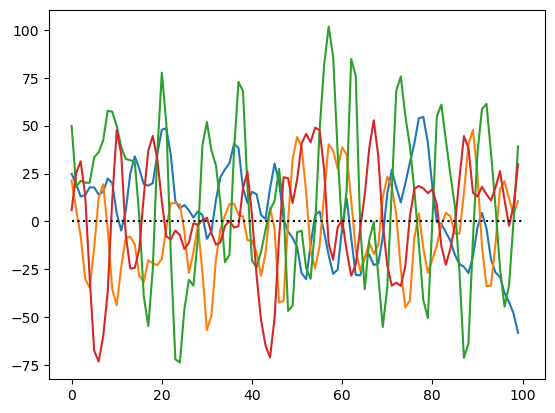

In [40]:
subs = list(timeseries.keys())

ts = timeseries[subs[0]]

fig, ax = plt.subplots()

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.plot(ts[:4, :100].T)
# ax.spines['bottom'].set_position('zero')
# ax.set_xticks([])
# ax.set_yticks([])
ax.plot([0,100],[0,0],color='black',linestyle='dotted')

# ax.grid(True, axis='y')

fig.show()